*** Homework 4 (question-2)***
Sumit Parwal

In [168]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import os
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

import statsmodels.api as sm
from sklearn import preprocessing
from sklearn.preprocessing import normalize
from sklearn.feature_selection import RFECV
import bootstrapped.bootstrap as bs
import bootstrapped.stats_functions as bs_stats
import warnings
import seaborn as sns
import csv
from pandas import read_csv
from sklearn.preprocessing import Imputer
import math
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from xgboost.sklearn import XGBClassifier
import xgboost as xgb
from tqdm import tqdm

from sklearn.metrics import f1_score, log_loss, confusion_matrix,classification_report
import scikitplot as skplt
from sklearn.metrics import accuracy_score, roc_curve, auc
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

import os
import traceback
import weka.core.jvm as jvm
from weka.core.converters import Loader
from weka.classifiers import Classifier, SingleClassifierEnhancer, MultipleClassifiersCombiner, FilteredClassifier, \
    PredictionOutput, Kernel, KernelClassifier
from weka.classifiers import Evaluation
from weka.filters import Filter
from weka.core.classes import Random, from_commandline

import weka.plot.graph as plot_graph
import weka.plot.classifiers as plcls

a)

In [169]:
data_train = pd.read_csv('aps_failure_training_set.csv', na_values=['na'])
data_test = pd.read_csv('aps_failure_test_set.csv', na_values=['na'])
len(data_test)


16000

b)i) Imputing using mean and also removing those features having null values very igh as compared to total values

In [170]:
train_X = data_train.copy(deep=True)
train_X.drop(['class'], inplace=True, axis=1)
train_Y = data_train['class'].copy(deep=True)


test_X = data_test.copy(deep=True)
test_X.drop(['class'], inplace=True, axis=1)
test_Y = data_test['class'].copy(deep=True)


# strings to float
train_X = train_X.astype('float64')
test_X = test_X.astype('float64')
# print(test_X)

In [171]:
feat_miss = list()
missing = train_X.isnull().sum()

for i in range(len(missing)):
    if missing[i]<40000 and missing[i]>0:
        feat_miss.append(train_X.columns[i])
feat_miss


['ac_000',
 'ad_000',
 'ae_000',
 'af_000',
 'ag_000',
 'ag_001',
 'ag_002',
 'ag_003',
 'ag_004',
 'ag_005',
 'ag_006',
 'ag_007',
 'ag_008',
 'ag_009',
 'ah_000',
 'ai_000',
 'aj_000',
 'ak_000',
 'al_000',
 'am_0',
 'an_000',
 'ao_000',
 'ap_000',
 'aq_000',
 'ar_000',
 'as_000',
 'at_000',
 'au_000',
 'av_000',
 'ax_000',
 'ay_000',
 'ay_001',
 'ay_002',
 'ay_003',
 'ay_004',
 'ay_005',
 'ay_006',
 'ay_007',
 'ay_008',
 'ay_009',
 'az_000',
 'az_001',
 'az_002',
 'az_003',
 'az_004',
 'az_005',
 'az_006',
 'az_007',
 'az_008',
 'az_009',
 'ba_000',
 'ba_001',
 'ba_002',
 'ba_003',
 'ba_004',
 'ba_005',
 'ba_006',
 'ba_007',
 'ba_008',
 'ba_009',
 'bb_000',
 'bc_000',
 'bd_000',
 'be_000',
 'bf_000',
 'bg_000',
 'bh_000',
 'bi_000',
 'bj_000',
 'bk_000',
 'bl_000',
 'bm_000',
 'bs_000',
 'bt_000',
 'bu_000',
 'bv_000',
 'bx_000',
 'by_000',
 'bz_000',
 'ca_000',
 'cb_000',
 'cc_000',
 'cd_000',
 'ce_000',
 'cf_000',
 'cg_000',
 'ch_000',
 'ci_000',
 'cj_000',
 'ck_000',
 'cl_000',
 

In [172]:
imputer = SimpleImputer(missing_values =np.nan, strategy = 'mean')
for i in range(len(feat_miss)):
    imputer = imputer.fit(train_X[[feat_miss[i]]])
    train_X[[feat_miss[i]]] = imputer.transform(train_X[[feat_miss[i]]]) 
print(len(train_X))

60000


In [173]:
imputer = SimpleImputer(missing_values =np.nan, strategy = 'mean')
for i in range(len(feat_miss)):
    imputer = imputer.fit(test_X[[feat_miss[i]]])
    test_X[[feat_miss[i]]] = imputer.transform(test_X[[feat_miss[i]]]) 
print(len(test_X))


16000


In [174]:
# the columns with more than 40000 NAN is removed so new train file.
train_X = train_X.dropna(axis=1)
test_X = test_X.dropna(axis=1)
print(train_X.shape,"train_X")
train_X.head()
print(test_X.shape,"test_X")

(60000, 163) train_X
(16000, 163) test_X


In [175]:
# downsampled csv train

df = pd.concat([train_X, train_Y],axis=1)
df_new = df.sample(n=6000)
# print(df_new)
df_new.to_csv('data_train_downsampled.csv', sep=',',index=False)



In [179]:
dfff = pd.concat([test_X, test_Y],axis=1)
dfff.to_csv('dat_test.csv', sep=',',index=False)

In [142]:
# # downsampled csv test
# dfr = pd.concat([test_X, test_Y],axis=1)
# dfr.to_csv('data_test_.csv', sep=',',index=False)

In [180]:
# complete csv test
df3 = pd.concat([test_X, test_Y],axis=1)
df3.to_csv('data_testsets.csv', sep=',',index=False)

In [181]:
# complete csv train

df2 = pd.concat([train_X, train_Y],axis=1)
df2.to_csv('data_trainset.csv', sep=',',index=False)

b)ii) 

In [182]:
data_train['class'] = pd.Categorical(data_train['class']).codes
data_test['class'] = pd.Categorical(data_test['class']).codes

In [183]:
train_Y = data_train['class'].copy(deep=True)
test_Y = data_test['class'].copy(deep=True)
# data_train['class']

In [184]:
data_train_describe = train_X.describe()
data_test_describe = test_X.describe()

data_train_describe

,aa_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,ag_004,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
count,6.000000e+04,6.000000e+04,6.000000e+04,60000.000000,60000.000000,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,...,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,60000.000000,60000.000000
mean,5.933650e+04,3.560143e+08,1.906206e+05,6.819130,11.006817,2.216364e+02,9.757223e+02,8.606015e+03,8.859128e+04,4.370966e+05,...,4.454897e+05,2.111264e+05,4.457343e+05,3.939462e+05,3.330582e+05,3.462714e+05,1.387300e+05,8.388915e+03,0.090579,0.212756
std,1.454301e+05,7.724678e+08,3.504515e+07,158.142022,205.375337,2.036363e+04,3.400875e+04,1.494791e+05,7.574598e+05,2.360968e+06,...,1.149060e+06,5.402722e+05,1.161763e+06,1.114758e+06,1.063164e+06,1.718366e+06,4.469894e+05,4.720424e+04,4.268529,8.627929
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,8.340000e+02,2.000000e+01,4.200000e+01,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.180000e+02,...,3.033500e+03,1.204000e+03,2.848500e+03,3.839000e+03,5.600000e+02,1.180000e+02,0.000000e+00,0.000000e+00,0.000000,0.000000
50%,3.077600e+04,1.880000e+02,2.880000e+02,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.881000e+03,...,2.397270e+05,1.148530e+05,2.283220e+05,1.960600e+05,9.976600e+04,4.358700e+04,4.474000e+03,0.000000e+00,0.000000,0.000000
75%,4.866800e+04,1.686000e+03,8.426500e+03,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,5.361500e+04,...,4.454897e+05,2.164440e+05,4.624655e+05,4.003010e+05,2.833455e+05,1.732245e+05,1.387300e+05,2.366000e+03,0.000000,0.000000
max,2.746564e+06,2.130707e+09,8.584298e+09,21050.000000,20070.000000,3.376892e+06,4.109372e+06,1.055286e+07,6.340207e+07,2.288306e+08,...,7.793393e+07,3.775839e+07,9.715238e+07,5.743524e+07,3.160781e+07,1.195801e+08,1.926740e+07,3.810078e+06,482.000000,1146.000000


In [185]:
#train
CV_train = {}
for i in range(train_X.shape[1]):
    s =  data_train_describe.iloc[2,i]
    m =data_train_describe.iloc[1,i]
    CV_train[i] = s/m
CV_train
# print(data_train.columns[92])
# print(data_train_describe['cf_000'][2]/data_train_describe['cf_000'][1])

{0: 2.4509375779439706,
 1: 2.169766523276598,
 2: 183.84762036903672,
 3: 23.190936665590005,
 4: 18.65892109601162,
 5: 91.87856462929975,
 6: 34.85495007772405,
 7: 17.369143404891002,
 8: 8.550049026710221,
 9: 5.40147869542194,
 10: 2.927092082425769,
 11: 2.344927070337641,
 12: 2.8334840909361785,
 13: 6.154583078552848,
 14: 32.98435104136501,
 15: 2.3001872486143595,
 16: 18.012681744456003,
 17: 43.80182238271064,
 18: 74.52668795867793,
 19: 9.074370822655146,
 20: 9.058671606115205,
 21: 2.2387967743802824,
 22: 2.260149116812674,
 23: 3.0591643066388774,
 24: 2.8396116933654727,
 25: 10.837049702201314,
 26: 86.4169038404694,
 27: 23.459424790823903,
 28: 68.16055401269416,
 29: 5.778784910087359,
 30: 3.877568338645049,
 31: 37.00956232706904,
 32: 52.233851763547925,
 33: 38.809580401925686,
 34: 28.41354153370017,
 35: 33.37471600467373,
 36: 12.384140755923994,
 37: 3.0230876409556102,
 38: 3.284242057455972,
 39: 3.7756475013657895,
 40: 83.78606300858267,
 41: 9.3283

b)iii

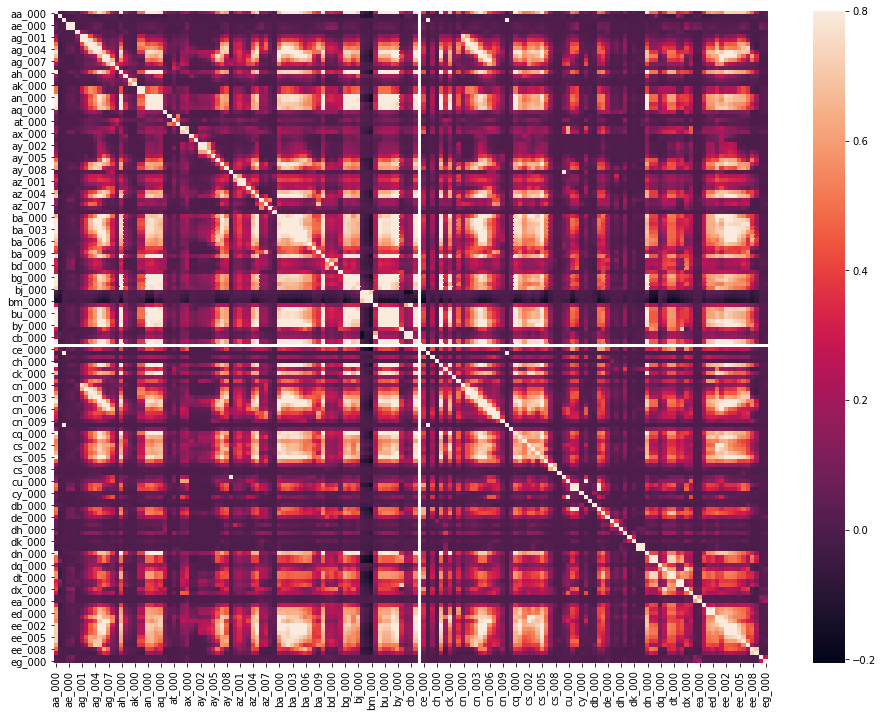

In [186]:
#train
corrmat = train_X.corr()
fig = plt.figure(figsize = (16, 12))

sns.heatmap(corrmat, vmax = 0.8)
plt.show()

b)iv)

In [190]:
dict = {}
i = 0
for key, value in sorted(CV_train.items(), key=lambda item: item[1],reverse=True):
    dict[i] = key
    i = i+1
dict

{0: 115,
 1: 85,
 2: 103,
 3: 2,
 4: 129,
 5: 131,
 6: 5,
 7: 26,
 8: 40,
 9: 50,
 10: 18,
 11: 28,
 12: 87,
 13: 32,
 14: 146,
 15: 127,
 16: 114,
 17: 161,
 18: 17,
 19: 162,
 20: 33,
 21: 133,
 22: 31,
 23: 128,
 24: 6,
 25: 132,
 26: 102,
 27: 134,
 28: 35,
 29: 147,
 30: 14,
 31: 34,
 32: 120,
 33: 93,
 34: 27,
 35: 3,
 36: 122,
 37: 49,
 38: 138,
 39: 4,
 40: 16,
 41: 7,
 42: 48,
 43: 104,
 44: 43,
 45: 91,
 46: 36,
 47: 121,
 48: 94,
 49: 130,
 50: 89,
 51: 25,
 52: 101,
 53: 41,
 54: 60,
 55: 19,
 56: 20,
 57: 47,
 58: 8,
 59: 42,
 60: 44,
 61: 145,
 62: 65,
 63: 62,
 64: 59,
 65: 95,
 66: 64,
 67: 139,
 68: 116,
 69: 100,
 70: 13,
 71: 79,
 72: 29,
 73: 160,
 74: 117,
 75: 9,
 76: 113,
 77: 144,
 78: 63,
 79: 108,
 80: 158,
 81: 123,
 82: 110,
 83: 92,
 84: 126,
 85: 148,
 86: 96,
 87: 30,
 88: 119,
 89: 39,
 90: 107,
 91: 69,
 92: 86,
 93: 143,
 94: 38,
 95: 151,
 96: 152,
 97: 159,
 98: 157,
 99: 99,
 100: 109,
 101: 23,
 102: 90,
 103: 37,
 104: 46,
 105: 57,
 106: 68,
 107

In [191]:
cols = list()
for i in range(0,13,1):
    cols.append(train_X.columns[dict[i]])

cols

['cs_009',
 'cf_000',
 'co_000',
 'ad_000',
 'dh_000',
 'dj_000',
 'ag_000',
 'as_000',
 'ay_009',
 'az_009',
 'ak_000',
 'au_000',
 'ch_000']

c:\users\sumit\appdata\local\programs\python\python37\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
c:\users\sumit\appdata\local\programs\python\python37\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


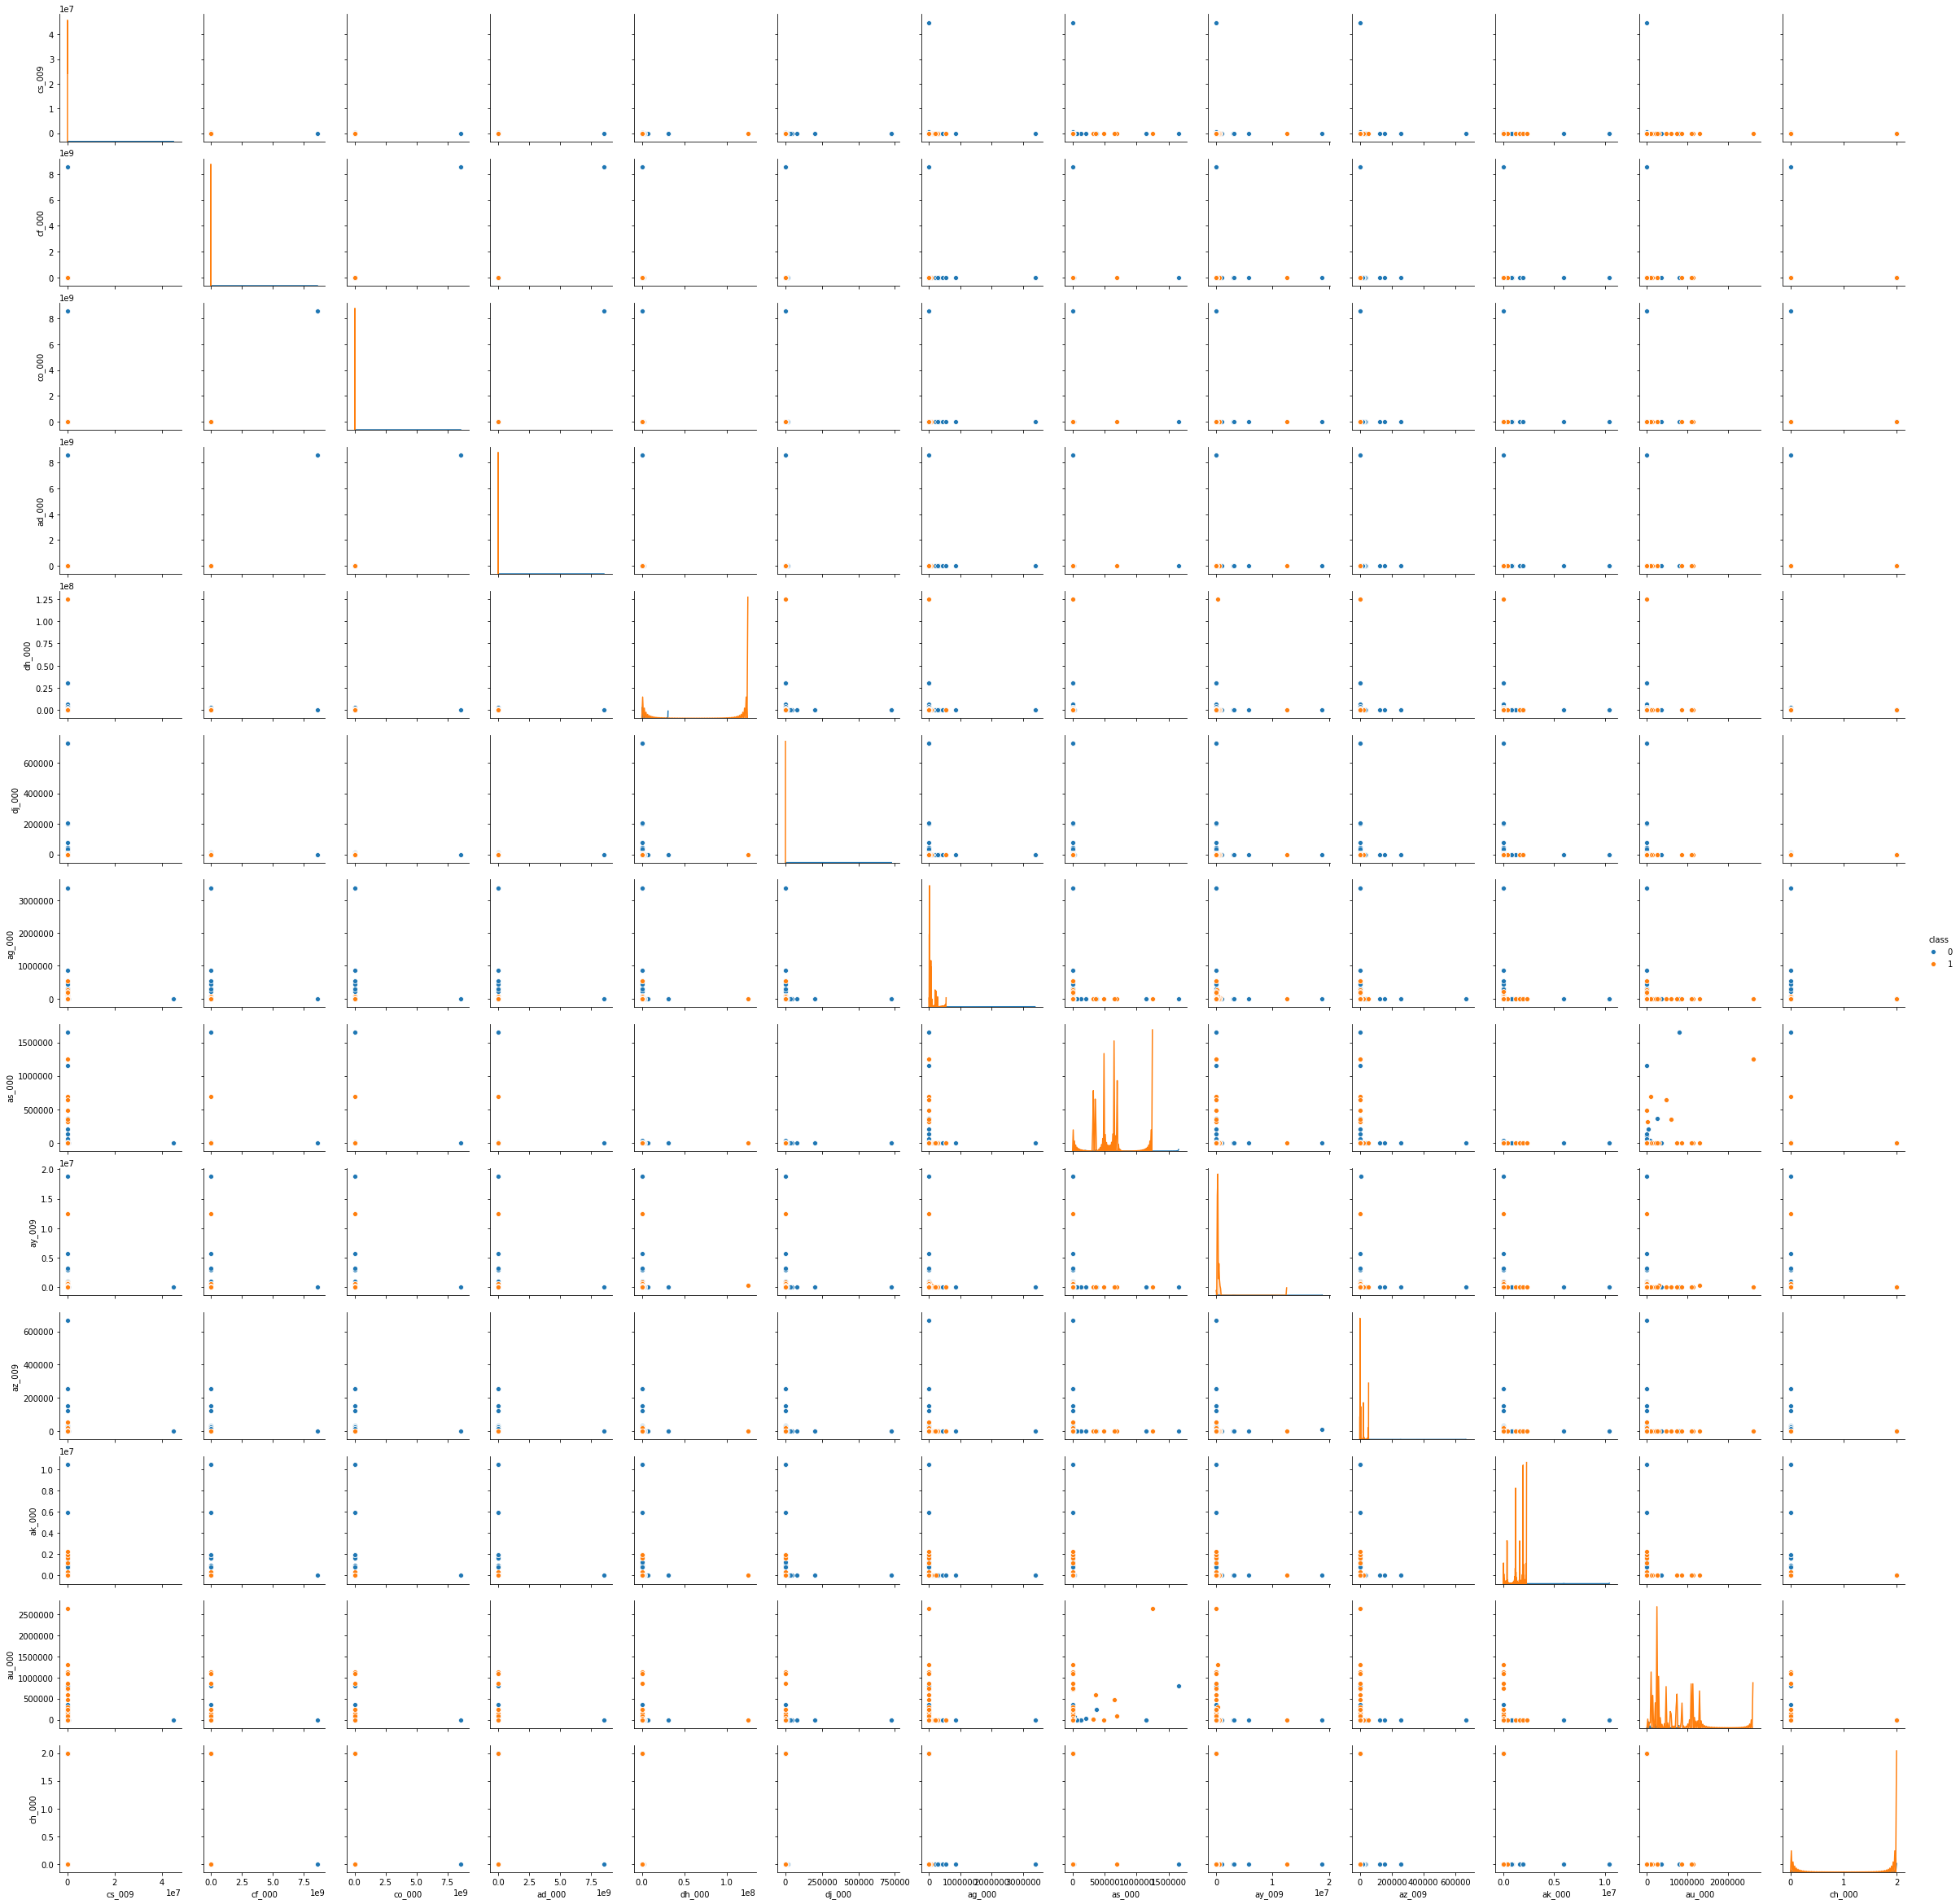

In [189]:
sns.pairplot(data_train, vars=cols , hue='class')

some of them are linear while others are not

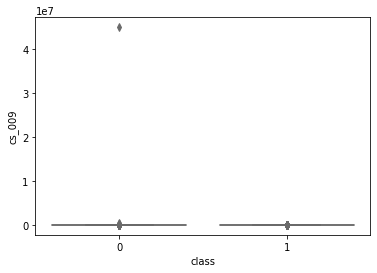

In [193]:
# for i in range(0,13,1):
ax = sns.boxplot(x=data_train.columns[0],y=cols[0],
                       data=data_train, palette="Set3")

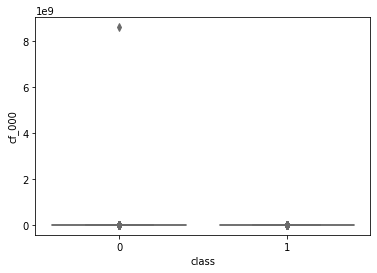

In [154]:
ax = sns.boxplot(x=data_train.columns[0],y=cols[1],
                       data=data_train, palette="Set3")

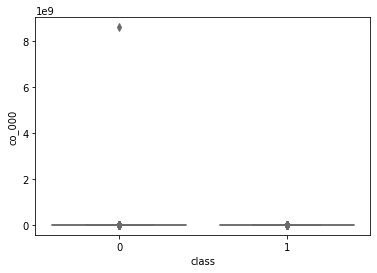

In [155]:
ax = sns.boxplot(x=data_train.columns[0],y=cols[2],
                       data=data_train, palette="Set3")

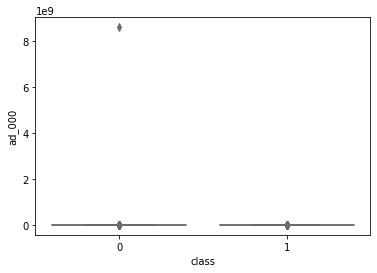

In [156]:
ax = sns.boxplot(x=data_train.columns[0],y=cols[3],
                       data=data_train, palette="Set3")

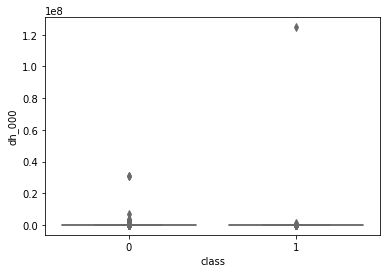

In [157]:
ax = sns.boxplot(x=data_train.columns[0],y=cols[4],
                       data=data_train, palette="Set3")

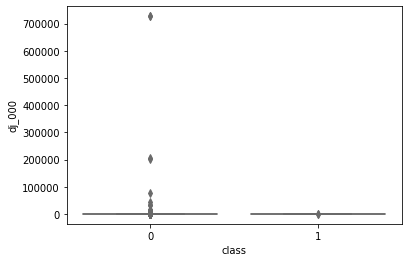

In [158]:
ax = sns.boxplot(x=data_train.columns[0],y=cols[5],
                       data=data_train, palette="Set3")

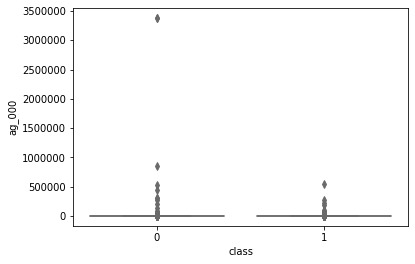

In [159]:
ax = sns.boxplot(x=data_train.columns[0],y=cols[6],
                       data=data_train, palette="Set3")

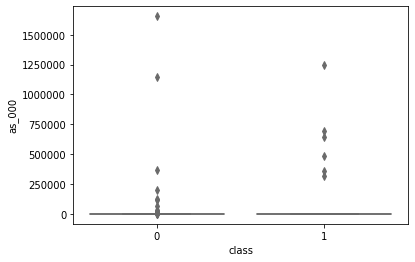

In [160]:
ax = sns.boxplot(x=data_train.columns[0],y=cols[7],
                       data=data_train, palette="Set3")

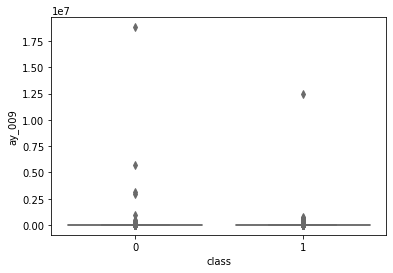

In [161]:
ax = sns.boxplot(x=data_train.columns[0],y=cols[8],
                       data=data_train, palette="Set3")

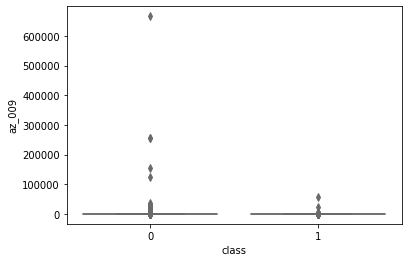

In [162]:
ax = sns.boxplot(x=data_train.columns[0],y=cols[9],
                       data=data_train, palette="Set3")

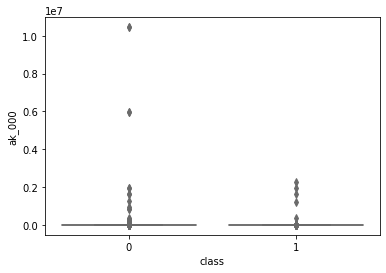

In [163]:
ax = sns.boxplot(x=data_train.columns[0],y=cols[10],
                       data=data_train, palette="Set3")

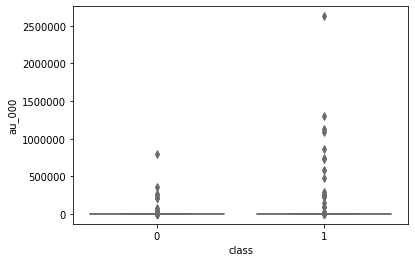

In [164]:
ax = sns.boxplot(x=data_train.columns[0],y=cols[11],
                       data=data_train, palette="Set3")

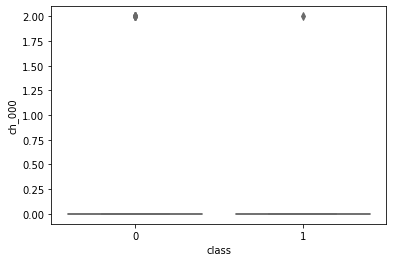

In [165]:
ax = sns.boxplot(x=data_train.columns[0],y=cols[12],
                       data=data_train, palette="Set3")

b)iv)

In [166]:
print(['neg', 'pos'])
print(np.bincount(data_train['class'].values))
print(np.bincount(data_test['class'].values))



['neg', 'pos']
[59000  1000]
[15625   375]


dataset is unbalanced

In [224]:
def score(test_Y,pred_Y,pred_Y_proba):
    if len(pred_Y)>0:
        f1 = f1_score(test_Y,pred_Y,average="weighted")
        print("F1 score: ",f1)
    if len(pred_Y_proba)>0:
        logloss = log_loss(test_Y,pred_Y_proba, eps=1e-15, normalize=True, sample_weight=None, labels=None)
        print("Log loss for predicted probabilities:",logloss)

c)

In [225]:

clf = RandomForestClassifier(n_estimators=250,n_jobs=-1,oob_score=True)
clf.fit(train_X,train_Y)





RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=250,
                       n_jobs=-1, oob_score=True, random_state=None, verbose=0,
                       warm_start=False)

In [226]:
pred_Y_rf = clf.predict(test_X)
pred_Y_proba_rf = clf.predict_proba(test_X)
# print(len(pred_Y_rf))
score(test_Y,pred_Y_rf,pred_Y_proba_rf)

F1 score:  0.9916988010656127
Log loss for predicted probabilities: 0.02620694824549511


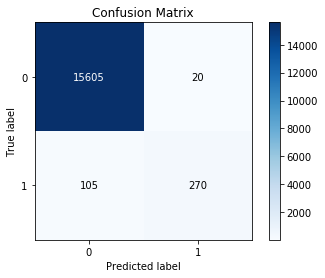

              precision    recall  f1-score   support

           0       0.99      1.00      1.00     15625
           1       0.93      0.72      0.81       375

    accuracy                           0.99     16000
   macro avg       0.96      0.86      0.90     16000
weighted avg       0.99      0.99      0.99     16000



In [227]:
tn, fp, fn, tp = confusion_matrix(test_Y, pred_Y_rf ).ravel()
skplt.metrics.plot_confusion_matrix(test_Y, pred_Y_rf, normalize=False)
plt.show() 
print(classification_report(test_Y,pred_Y_rf))

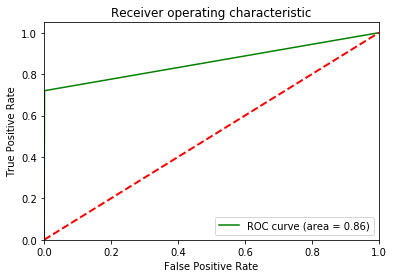

In [228]:

fpr, tpr, thresholds = roc_curve(test_Y, pred_Y_rf)
roc_auc = auc(fpr, tpr)


plt.figure()
plt.plot(fpr, tpr, color='green', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [229]:
roc_auc

0.8593600000000001

In [230]:
classification_error = (fp + fn) / float(tp + tn + fp + fn)
print(classification_error)

0.0078125


In [231]:
clf.oob_score_

0.9940666666666667

In [232]:
oob_error_balanced = 1- clf.oob_score_
oob_error_balanced

0.005933333333333346

d)

In [209]:

clf = RandomForestClassifier(n_estimators=250,n_jobs=-1, class_weight='balanced',oob_score=True)
clf.fit(train_X,train_Y)

RandomForestClassifier(bootstrap=True, class_weight='balanced',
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=250, n_jobs=-1, oob_score=True,
                       random_state=None, verbose=0, warm_start=False)

In [210]:
pred_Y_rf = clf.predict(test_X)
pred_Y_proba_rf = clf.predict_proba(test_X)
# print(len(pred_Y_rf))
score(test_Y,pred_Y_rf,pred_Y_proba_rf)

F1 score:  0.9880939782809876
Log loss for predicted probabilities: 0.030828527174250102


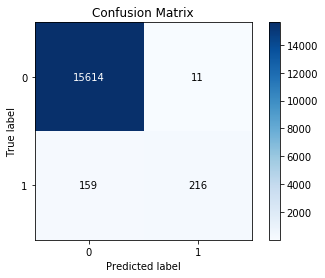

              precision    recall  f1-score   support

           0       0.99      1.00      0.99     15625
           1       0.95      0.58      0.72       375

    accuracy                           0.99     16000
   macro avg       0.97      0.79      0.86     16000
weighted avg       0.99      0.99      0.99     16000



In [211]:
tn, fp, fn, tp = confusion_matrix(test_Y, pred_Y_rf ).ravel()
skplt.metrics.plot_confusion_matrix(test_Y, pred_Y_rf, normalize=False)
plt.show() 
print(classification_report(test_Y,pred_Y_rf))

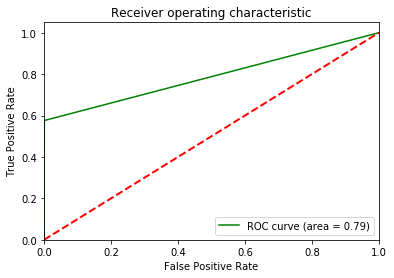

In [212]:

fpr, tpr, thresholds = roc_curve(test_Y, pred_Y_rf)
roc_auc = auc(fpr, tpr)


plt.figure()
plt.plot(fpr, tpr, color='green', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [213]:
classification_error = (fp + fn) / float(tp + tn + fp + fn)
print(classification_error)

0.010625


In [214]:
roc_auc

0.787648

In [216]:
clf.oob_score_


0.9925833333333334

In [217]:
oob_error = 1- clf.oob_score_
oob_error

0.007416666666666627

oob_without balance error = 0.005933333333333346
oob_balanced = 0.007416666666666627

as you can seee there is very less differnce between the two random forest algorithms
but if you see classificataion error without balanced(0.0078125)  is lower as compared to with balance(0.010625)

e)

In [47]:
import weka.core.jvm as jvm
jvm.start()

DEBUG:weka.core.jvm:Adding bundled jars
DEBUG:weka.core.jvm:Classpath=['c:\\users\\sumit\\appdata\\local\\programs\\python\\python37\\lib\\site-packages\\javabridge\\jars\\rhino-1.7R4.jar', 'c:\\users\\sumit\\appdata\\local\\programs\\python\\python37\\lib\\site-packages\\javabridge\\jars\\runnablequeue.jar', 'c:\\users\\sumit\\appdata\\local\\programs\\python\\python37\\lib\\site-packages\\javabridge\\jars\\cpython.jar', 'c:\\users\\sumit\\appdata\\local\\programs\\python\\python37\\lib\\site-packages\\weka\\lib\\python-weka-wrapper.jar', 'c:\\users\\sumit\\appdata\\local\\programs\\python\\python37\\lib\\site-packages\\weka\\lib\\weka.jar']
DEBUG:weka.core.jvm:MaxHeapSize=default
DEBUG:weka.core.jvm:Package support disabled


In [48]:
import weka.core.converters as converters
data = converters.load_any_file('data_trainset.csv')
data.class_is_last()
test = converters.load_any_file('data_testsets.csv')
test.class_is_last()

In [49]:
cls = Classifier(classname="weka.classifiers.trees.LMT")
pout = PredictionOutput(classname="weka.classifiers.evaluation.output.prediction.PlainText",options=(['distribution']))

In [50]:
evl = Evaluation(data)
evl.crossvalidate_model(cls, data, 5, Random(1), pout)


Accuracy: 99.195
=== Detailed Accuracy By Class ===

                 TP Rate  FP Rate  Precision  Recall   F-Measure  MCC      ROC Area  PRC Area  Class
                 0.997    0.315    0.995      0.997    0.996      0.738    0.937     0.995     neg
                 0.685    0.003    0.803      0.685    0.739      0.738    0.937     0.728     pos
Weighted Avg.    0.992    0.310    0.991      0.992    0.992      0.738    0.937     0.991     

Confusion Matrix: 
[[58832.   168.]
 [  315.   685.]]


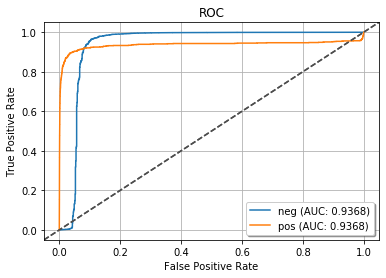

In [51]:
print("Accuracy:", evl.percent_correct)
# print(evl.summary())
print(evl.class_details())
print("Confusion Matrix: \n" + str(evl.confusion_matrix))
plcls.plot_roc(evl, class_index=[0, 1], wait=True)

Accuracy: 99.01875
=== Detailed Accuracy By Class ===

                 TP Rate  FP Rate  Precision  Recall   F-Measure  MCC      ROC Area  PRC Area  Class
                 0.998    0.315    0.992      0.998    0.995      0.767    0.972     0.998     neg
                 0.685    0.002    0.868      0.685    0.766      0.767    0.972     0.814     pos
Weighted Avg.    0.990    0.307    0.990      0.990    0.990      0.767    0.972     0.994     

Confusion Matrix: 
[[15586.    39.]
 [  118.   257.]]


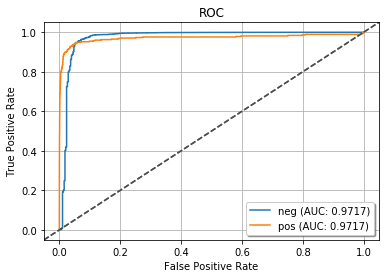

In [52]:
cls = Classifier(classname="weka.classifiers.trees.LMT")
cls.build_classifier(data)

evl = Evaluation(test)
evl.test_model(cls, test)
print("Accuracy:", evl.percent_correct)
# print(evl.summary())
print(evl.class_details())
print("Confusion Matrix: \n" + str(evl.confusion_matrix))
plcls.plot_roc(evl, class_index=[0, 1], wait=True)


f) this is done on 6000 -training
                   12000 -after SMOTE

In [77]:


from imblearn.over_sampling import SMOTE
import pandas as pd

# Loading the DATA
aps_train_smote = pd.read_csv('data_train_downsampled.csv')

# initialising SMOTE
smote = SMOTE(random_state=0,ratio=1)

# Dividing the data into X and Y
aps_train_x=aps_train_smote.drop('class',axis=1)
aps_train_y=aps_train_smote['class']

#Fit SMOTE and BALANCE CLASSES

smote_fit = smote.fit_sample(aps_train_x,aps_train_y)
X_smote= pd.DataFrame(smote_fit[0])
Y_smote= pd.DataFrame(smote_fit[1],columns=['class'])
aps_train_smote = pd.concat([X_smote,Y_smote],axis=1)



In [78]:


print("After Balancing : \n",aps_train_smote['class'].value_counts())



After Balancing : 
 neg    5903
pos    5903
Name: class, dtype: int64


In [79]:
import weka.core.converters as convert
aps_train_smote.to_csv('aps_train_smote.csv',sep=',',index=False)
aps_train = convert.load_any_file(filename='aps_train_smote.csv')
aps_train.class_is_last()



In [80]:
from weka.classifiers import Classifier
from weka.classifiers import Evaluation
from weka.core.classes import Random
import weka.plot.classifiers as plcls

In [81]:
smote_cls = Classifier(classname="weka.classifiers.trees.LMT")
tr_smote_eval = Evaluation(aps_train)
tr_smote_eval.crossvalidate_model(classifier=smote_cls,data=aps_train,num_folds=5,rnd=Random(0))

In [83]:

print("Train CV Error = %.2f%%" % (tr_smote_eval.percent_incorrect))
print(tr_smote_eval.matrix())

Train CV Error = 1.19%
=== Confusion Matrix ===

    a    b   <-- classified as
 5823   80 |    a = neg
   61 5842 |    b = pos



In [84]:
smote_cls1 = Classifier.make_copy(smote_cls)
smote_cls1.build_classifier(aps_train)
predict_y = tr_smote_eval.test_model(smote_cls1,aps_train)

from sklearn.metrics import roc_curve, auc, confusion_matrix
from sklearn import metrics

In [85]:
y_true = np.array(np.where(aps_train_smote['class']=='neg',0,1))

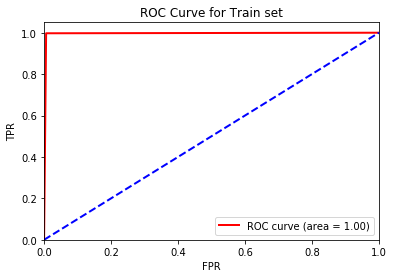

In [86]:
fpr, tpr, _ = roc_curve(y_true,predict_y)
plt.figure()
plt.plot(fpr, tpr, color='red',lw=2, label='ROC curve (area = %0.2f)' % auc(fpr, tpr))
plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Curve for Train set')
plt.legend(loc="lower right")
plt.show()

In [194]:

aps_test = convert.load_any_file(filename='dat_test.csv')

In [195]:
aps_test.class_is_last()
ts_eval=Evaluation(aps_test)
test_pred_y=ts_eval.test_model(smote_cls1,aps_test)

In [196]:


print("Test Error for SMOTE = %.2f%%" % (ts_eval.percent_incorrect))
print(ts_eval.matrix())



Test Error for SMOTE = 2.17%
=== Confusion Matrix ===

     a     b   <-- classified as
 15356   269 |     a = neg
    78   297 |     b = pos



In [197]:
aps_test1= pd.read_csv('dat_test.csv')
y_test_true=np.array(np.where(aps_test1['class']=='neg',0,1))

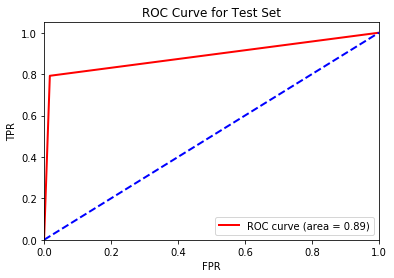

In [198]:


fpr, tpr, _ = roc_curve(y_test_true,test_pred_y)
plt.figure()
plt.plot(fpr, tpr, color='red',lw=2, label='ROC curve (area = %0.2f)' % auc(fpr, tpr))
plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Curve for Test Set')
plt.legend(loc="lower right")
plt.show()



The AUC for case where the class imbalance was uncompensted was 0.85 and now using SMOTE for balancing classes gives us AUC of 0.89 for test set. It shows that the model has improved considerably using SMOTE.